# Taller 1 - Universidad de los Andes

**Participantes:**

- Erich Giusseppe Soto Parada 
- Nombre 2  
- Nombre 3  


### imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import one_hot
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt

### Carga de los datos

In [2]:
data_mpg = "/home/erich/dev/mastering_machine_learning/taller_clase_2/Erich/data/auto-mpg.data"

In [3]:
df = pd.read_csv(data_mpg ,
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

In [4]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [17]:
print(f"Shape:  \n{df.shape}\n")
print(f"Numero de nulos: \n{df.isna().sum()}")

Shape:  
(398, 8)

Numero de nulos: 
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [18]:
df = df.dropna()
df = df.reset_index(drop=True)
print(f"Shape:  \n{df.shape}\n")
print(f"Numero de nulos: \n{df.isna().sum()}")

Shape:  
(392, 8)

Numero de nulos: 
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


### Exploracion de los datos 

In [20]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


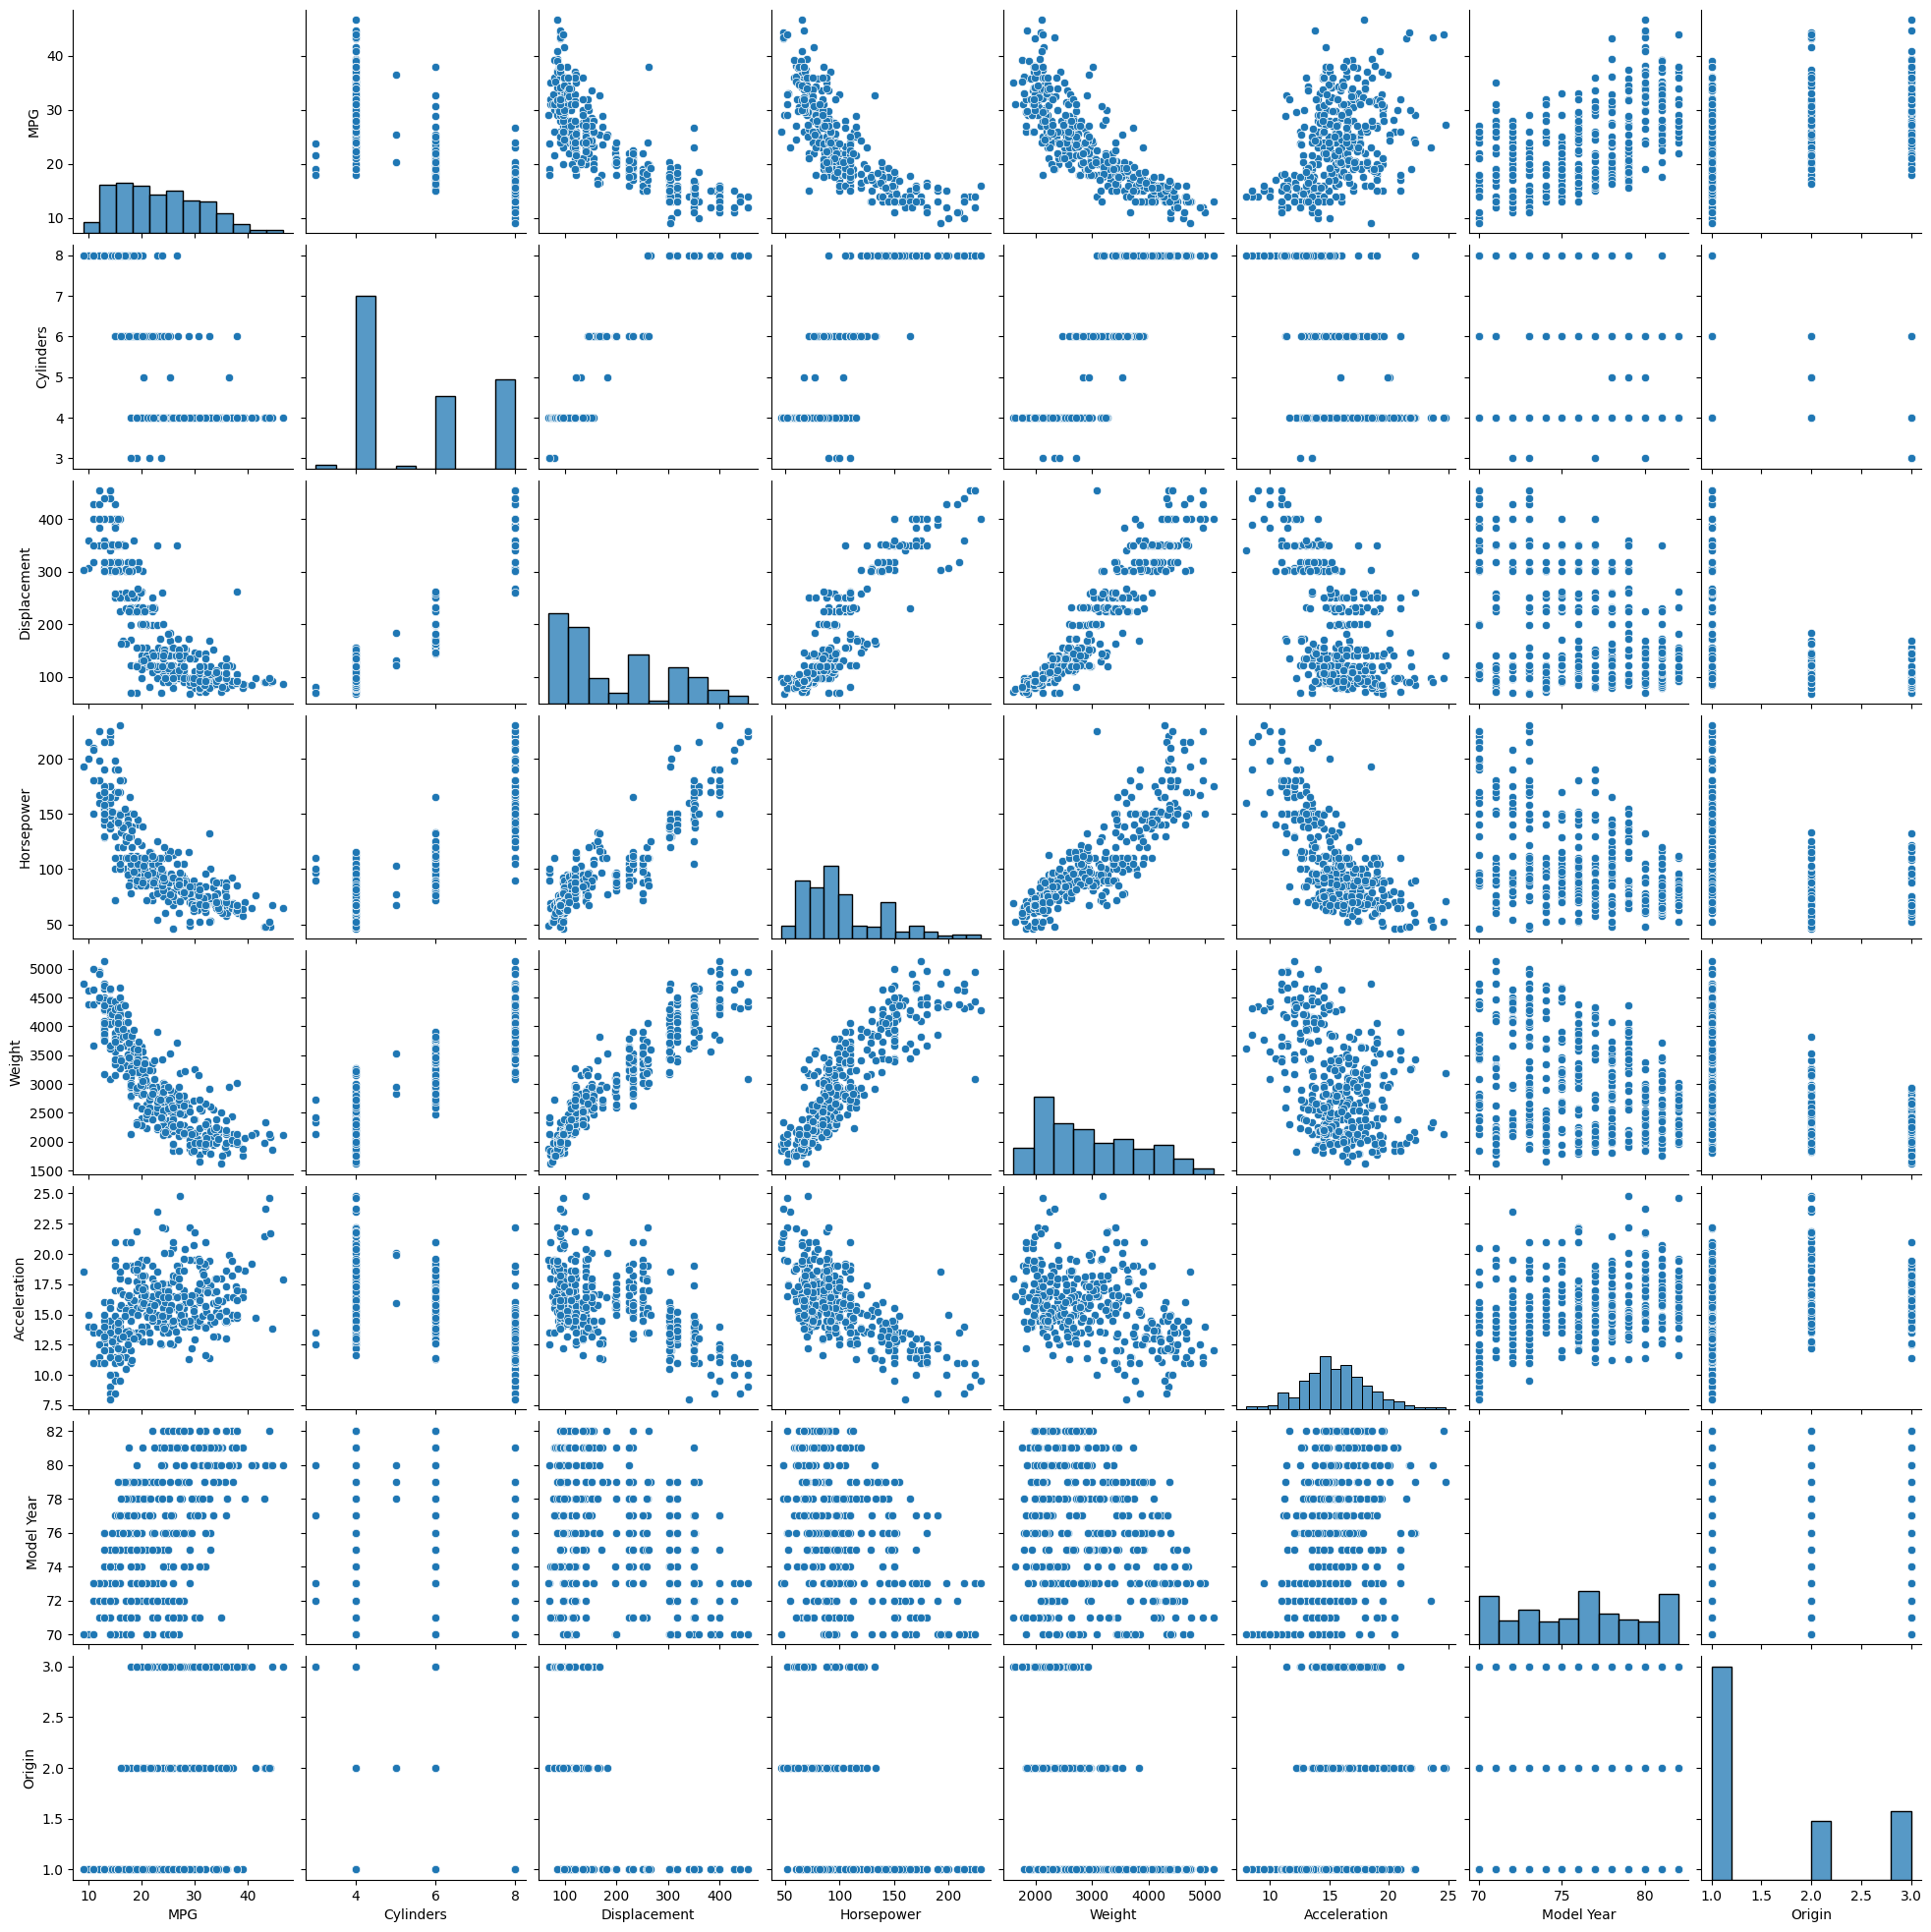

In [21]:
sns.pairplot(df)

Pareciera que muchas de las relaciones por ejemplo tiene mpg aunque pueden ser aproximadas mediante una funcion mas parecida a una exponencial negativa, esto teniendo en cuenta que solo se pueden usar capas lineales tendremos que intentar linealizar los datos del modelos lo mas posible para que el modelo dadas sus capacidades pueda hacer correctamente las predicciones, esto dado que nuestro modelo solo puede aprender relaciones lineales y el modelo de redes neuronales en este caso al no tener funcion de activacion son combinaciones lineales.

In [23]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [24]:
# Se hace la prueba para visualizar si los cambios son los correctos se puede intentar usar boxcox 
# para algo digamos automatizado pero dado el comportamiento se propone utilizar logaritmica dado que el comportamiento que se ve es exponencial.
columnas_transformacion = [ 'Displacement', 'Horsepower', 'Weight']
df_try = df.copy() 

for columna in columnas_transformacion:
    new_column = f"log_{columna}"
    df_try[new_column] = np.log(df_try[columna])
    df_try = df_try.drop(columns=columna)

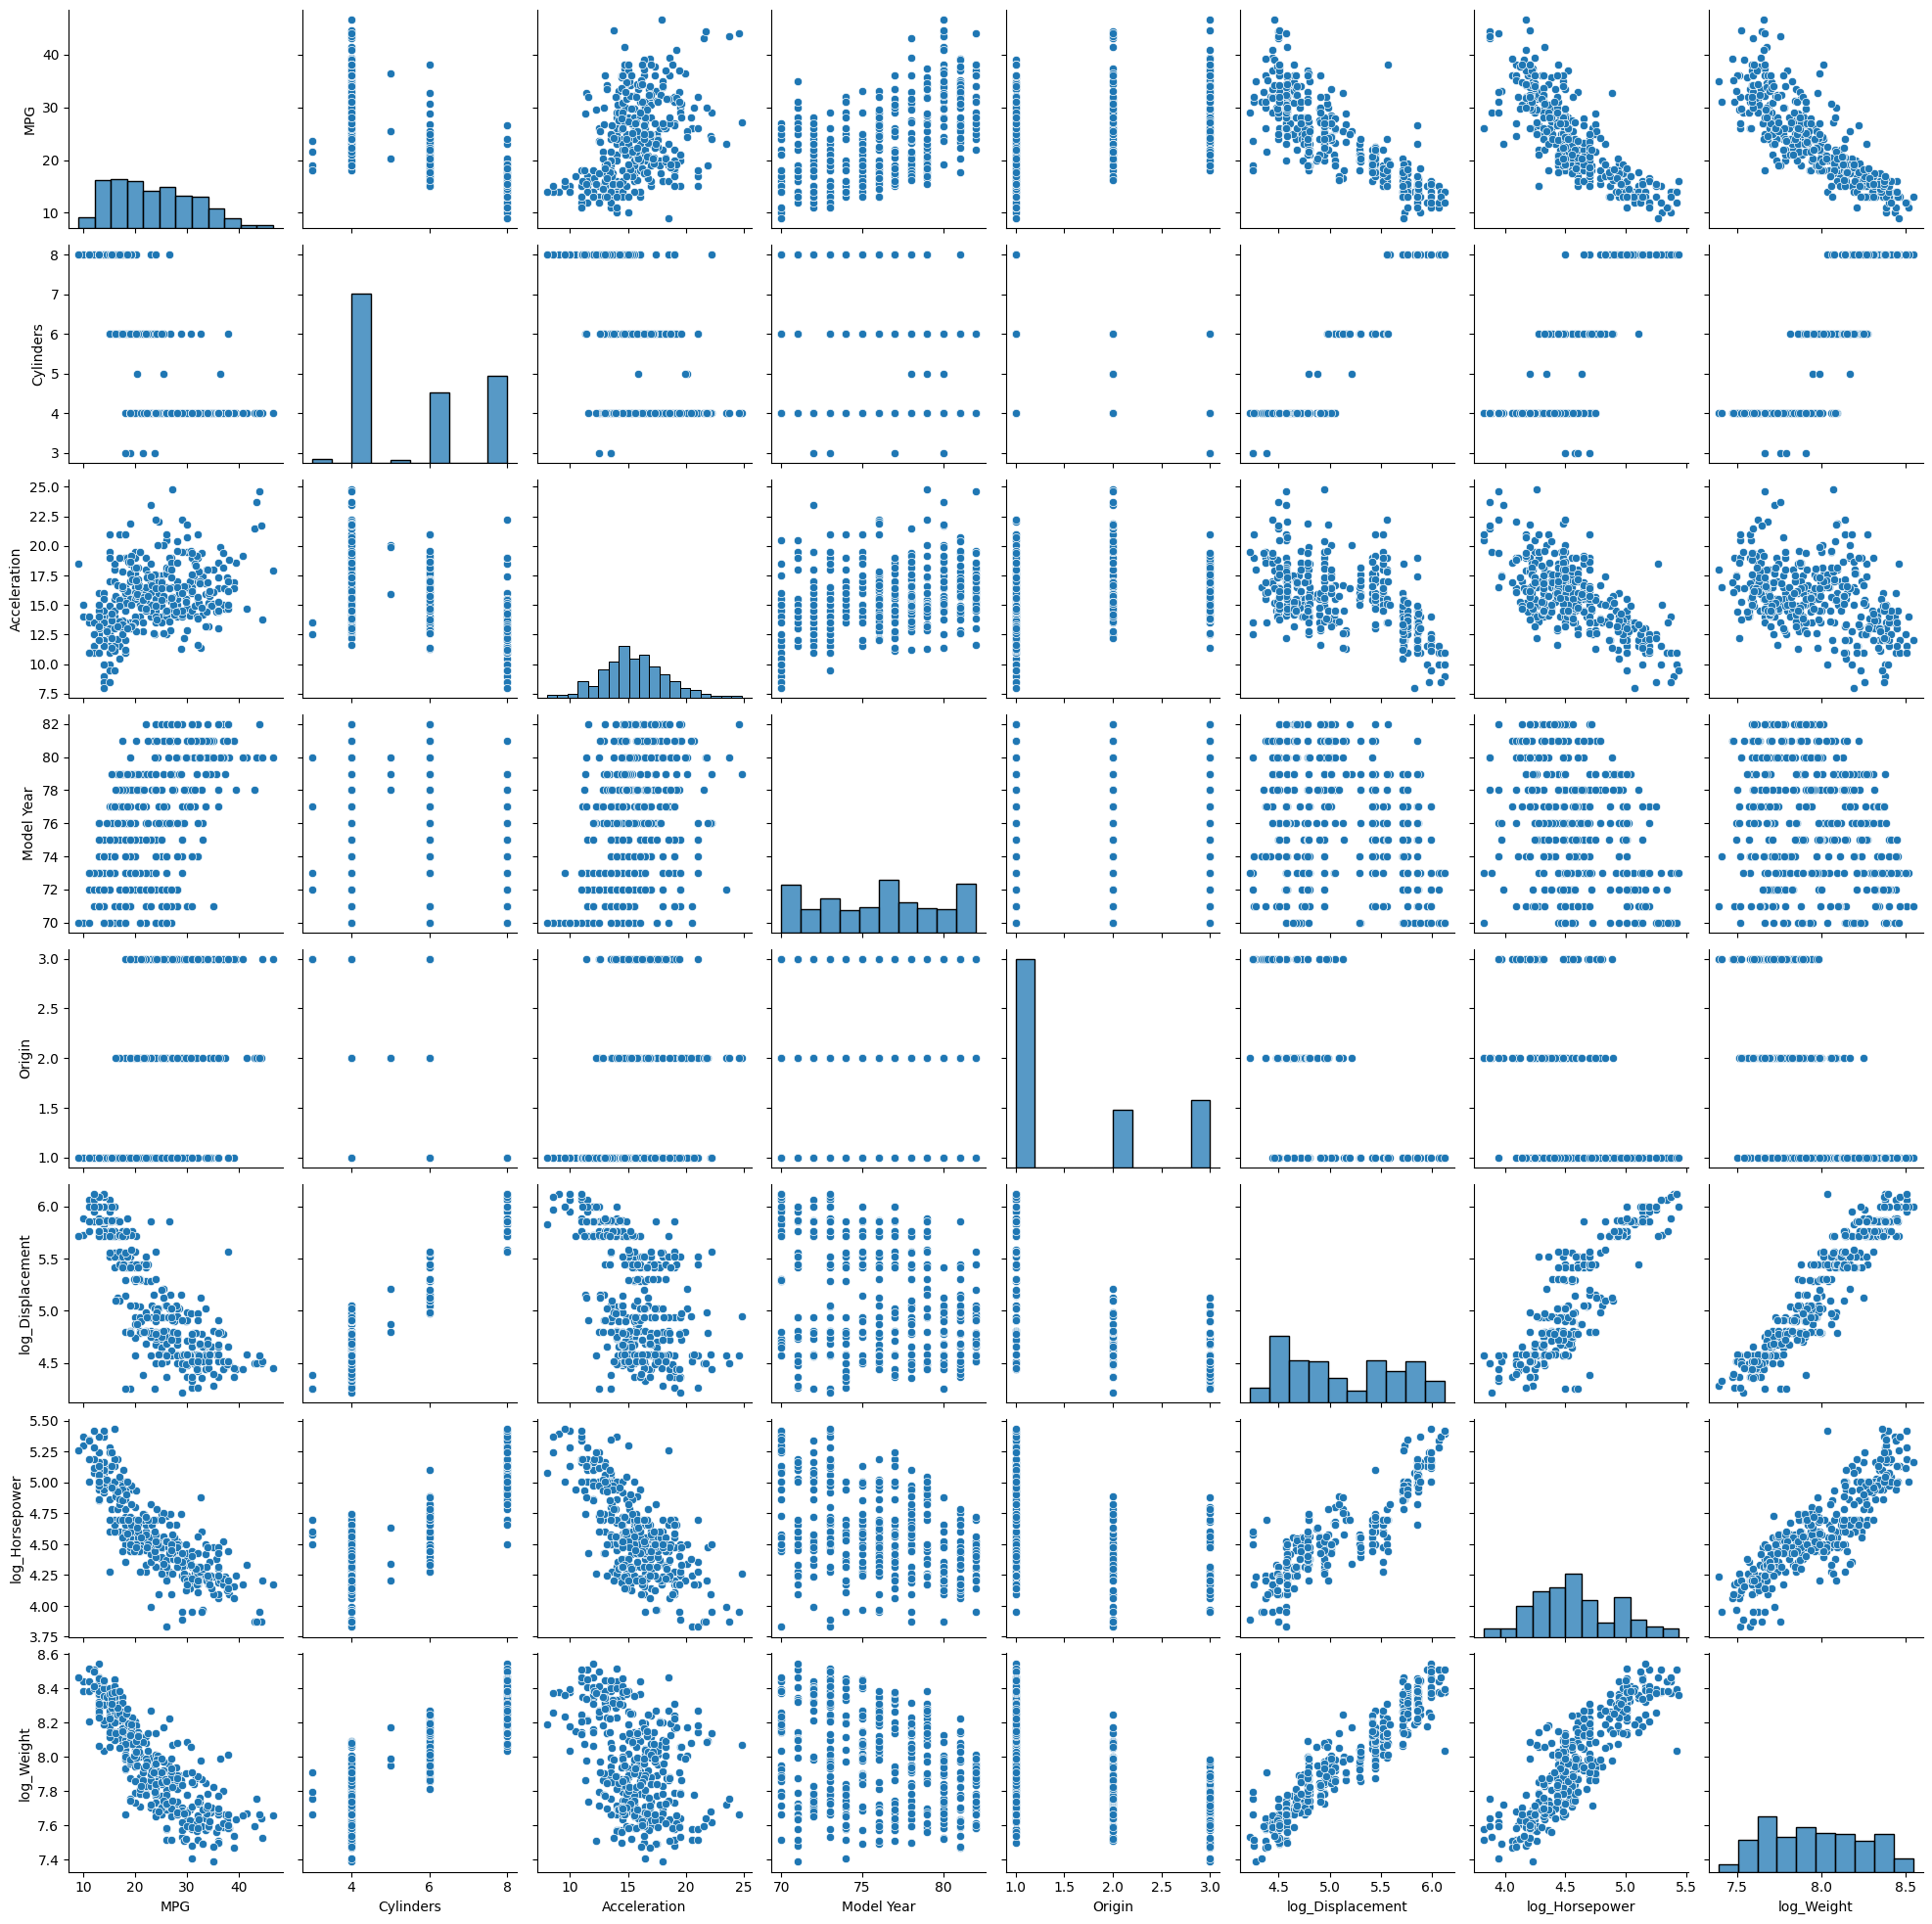

In [25]:
sns.pairplot(df_try)

Ahora para comprobar que las transformaciones funcionaron o son mejores se pueden ver los resultados al implementar modelos o en su defecto podemos ver las correlaciones lineales que nos da pearson para ver que tanto mejoramos o no estas relaciones.

<Axes: >

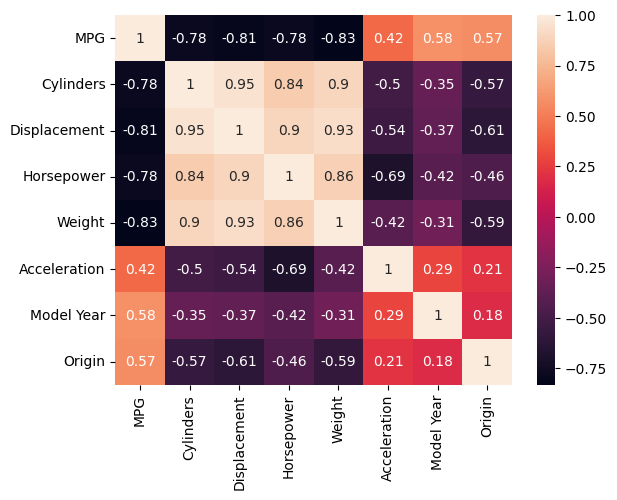

In [27]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

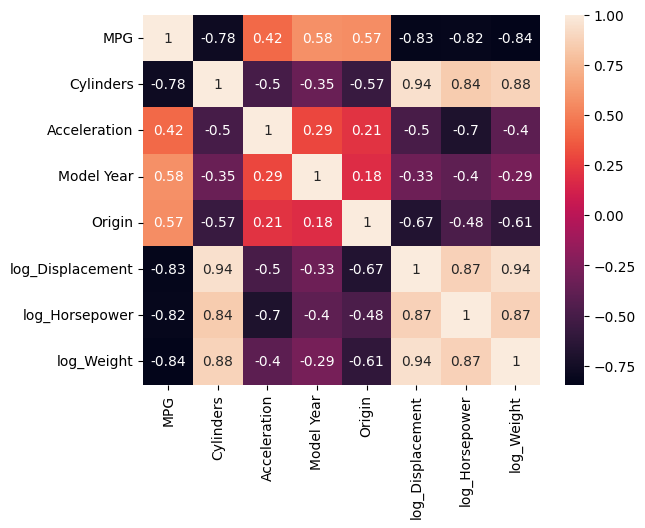

In [ ]:
sns.heatmap(df_try.corr(), annot=True)


vemos que si mejora un poco las coorelaciones lineales, por ende dejaremos las variables transformadas con logaritmos

# Parte 1 

Dadas las correlaciones la que tiene mayor coorelacion es la de log_weight por ende va a ser la que se va a utilizar, por ende partiremos los datos en X y Y.

In [35]:
X = df_try[["log_Weight"]]
Y = df_try[["MPG"]]

particion de los datos en train y test

In [36]:
from sklearn.preprocessing import StandardScaler

In [41]:
x_train["log_Weight"] 

161    8.238801
361    8.150468
205    8.055158
35     8.102284
249    8.180321
         ...   
293    7.557473
235    7.626083
84     8.318742
95     8.248267
215    7.675546
Name: log_Weight, Length: 313, dtype: float64

In [45]:
x_train_scaled

array([[ 9.77183453e-01],
       [ 6.65044783e-01],
       [ 3.28252110e-01],
       [ 4.94778449e-01],
       [ 7.70534661e-01],
       [-5.02926042e-02],
       [ 1.49310616e+00],
       [-3.74372056e-01],
       [ 1.36160639e+00],
       [ 2.05850531e+00],
       [-9.16122381e-01],
       [-1.06436353e+00],
       [-5.88769235e-01],
       [-1.18967134e+00],
       [-6.40035501e-01],
       [ 9.04600551e-02],
       [ 1.14376549e-01],
       [ 1.42303382e+00],
       [ 1.28457327e+00],
       [ 1.43781555e+00],
       [-8.68583792e-01],
       [ 5.56308557e-01],
       [ 5.61563054e-01],
       [-8.98617219e-01],
       [-5.28215637e-01],
       [ 1.08928467e+00],
       [ 2.01486219e-01],
       [-1.64923338e+00],
       [ 3.72669420e-02],
       [-1.90383503e-01],
       [ 1.59018615e+00],
       [-1.14854208e+00],
       [-3.16005477e-03],
       [ 1.39245358e+00],
       [-2.55944725e-01],
       [ 9.54705889e-01],
       [ 6.48690002e-01],
       [-1.10451906e+00],
       [ 6.5

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=77)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
#x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_train_scaled = torch.tensor(x_train_scaled).float() #['log_Weight'].values

x_test_scaled = scaler.transform(x_test)
#x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)
x_test_scaled = torch.tensor(x_test_scaled).float() #['log_Weight'].values

y_train_tensor = torch.tensor(y_train['MPG'].values).float()
y_test_tensor = torch.tensor(y_test['MPG'].values).float()

### Punto 1 y Punto 2

In [60]:
from torch.utils.data import Dataset, TensorDataset, DataLoader

train_ds = TensorDataset(x_train_scaled, y_train_tensor)
batch_size = 16
torch.manual_seed(77)

train_dl = DataLoader(train_ds, batch_size, shuffle = True)

In [57]:
import torch.nn as nn

hidden_units = [2]
input_size = x_train.shape[1]

all_layers = []
for hidden_units_layer in hidden_units:
  layer = nn.Linear(input_size, hidden_units_layer)
  all_layers.append(layer)
  #all_layers.append(nn.ReLU())
  input_size = hidden_units_layer

all_layers.append(nn.Linear(hidden_units[-1], 1))
model = nn.Sequential(*all_layers)

model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=1, bias=True)
)

In [66]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

torch.manual_seed(1)
num_epochs = 200
log_epochs = 20
loss_history = []

for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:,0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()

    avg_loss = loss_hist_train / len(train_dl)
    loss_history.append(avg_loss)
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {avg_loss:.4f}')

Epoch 0 Loss 16.7780
Epoch 20 Loss 16.9788
Epoch 40 Loss 16.5902
Epoch 60 Loss 16.5387
Epoch 80 Loss 16.5617
Epoch 100 Loss 16.4791
Epoch 120 Loss 16.7198
Epoch 140 Loss 16.8722
Epoch 160 Loss 16.7561
Epoch 180 Loss 16.5868


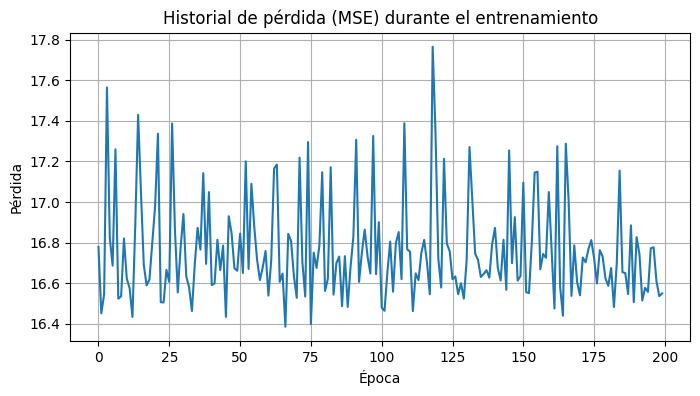

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(loss_history)
plt.title('Historial de pérdida (MSE) durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()

In [63]:
with torch.no_grad():
    pred = model(x_test_scaled.float())[:,0]
    loss = loss_fn(pred, y_test_tensor)
    print(f'Test MSE: {loss.item():.4f}')
    print(f'Test MAE: {nn.L1Loss()(pred,y_test_tensor).item():.4f}')

Test MSE: 20.6167
Test MAE: 3.3481


In [64]:
x_plot = x_test_scaled[:, 0].numpy()
y_true = y_test_tensor.numpy()
y_pred = pred.numpy()

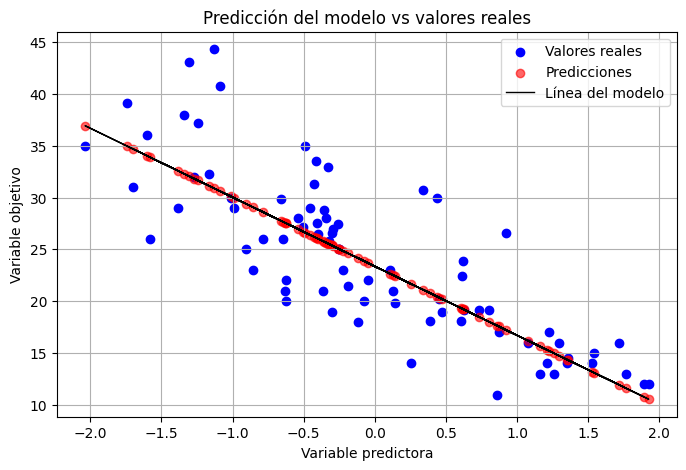

In [65]:
plt.figure(figsize=(8, 5))
plt.scatter(x_plot, y_true, color='blue', label='Valores reales')
plt.scatter(x_plot, y_pred, color='red', alpha=0.6, label='Predicciones')
plt.plot(x_plot, y_pred, color='black', linewidth=1, label='Línea del modelo')
plt.title('Predicción del modelo vs valores reales')
plt.xlabel('Variable predictora')
plt.ylabel('Variable objetivo')
plt.legend()
plt.grid(True)
plt.show()

### Punto 3

In [68]:
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torch.nn as nn

train_ds = TensorDataset(x_train_scaled, y_train_tensor)
batch_size = 16
torch.manual_seed(77)

train_dl = DataLoader(train_ds, batch_size, shuffle = True)


hidden_units = [2]
input_size = x_train.shape[1]

all_layers = []
for hidden_units_layer in hidden_units:
    layer = nn.Linear(input_size, hidden_units_layer)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_units_layer

all_layers.append(nn.Linear(hidden_units[-1], 1))
model = nn.Sequential(*all_layers)

model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

In [69]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

torch.manual_seed(1)
num_epochs = 200
log_epochs = 20
loss_history = []

for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:,0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()

    avg_loss = loss_hist_train / len(train_dl)
    loss_history.append(avg_loss)
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {avg_loss:.4f}')

Epoch 0 Loss 560.8781
Epoch 20 Loss 16.9734
Epoch 40 Loss 16.5838
Epoch 60 Loss 16.5335
Epoch 80 Loss 16.5506
Epoch 100 Loss 16.4677
Epoch 120 Loss 16.7036
Epoch 140 Loss 16.8613
Epoch 160 Loss 16.7430
Epoch 180 Loss 16.5782


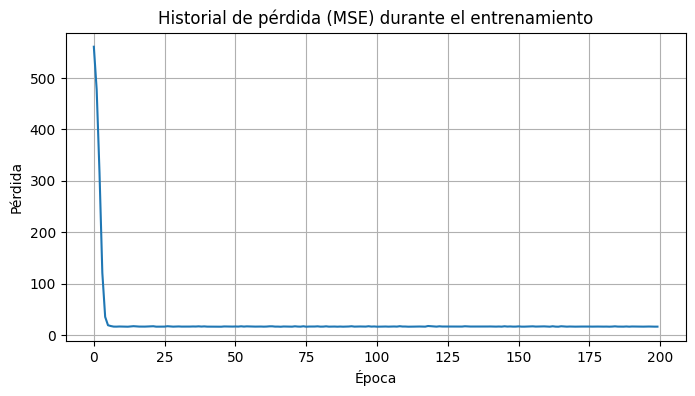

In [70]:
plt.figure(figsize=(8, 4))
plt.plot(loss_history)
plt.title('Historial de pérdida (MSE) durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()

In [71]:
with torch.no_grad():
    pred = model(x_test_scaled.float())[:,0]
    loss = loss_fn(pred, y_test_tensor)
    print(f'Test MSE: {loss.item():.4f}')
    print(f'Test MAE: {nn.L1Loss()(pred,y_test_tensor).item():.4f}')

Test MSE: 20.6271
Test MAE: 3.3484


In [72]:
x_plot = x_test_scaled[:, 0].numpy()
y_true = y_test_tensor.numpy()
y_pred = pred.numpy()

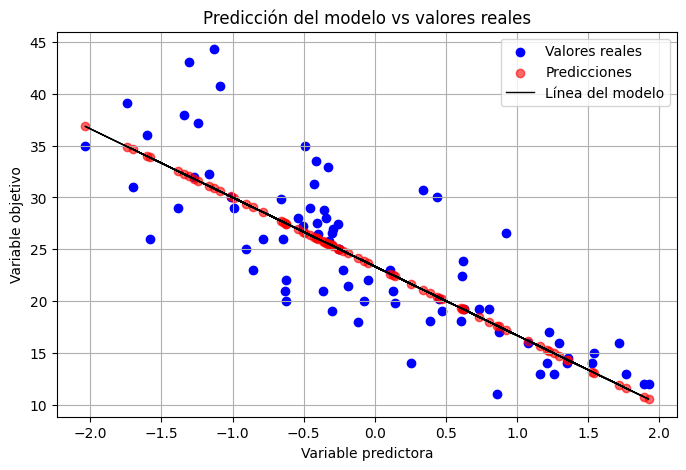

In [73]:
plt.figure(figsize=(8, 5))
plt.scatter(x_plot, y_true, color='blue', label='Valores reales')
plt.scatter(x_plot, y_pred, color='red', alpha=0.6, label='Predicciones')
plt.plot(x_plot, y_pred, color='black', linewidth=1, label='Línea del modelo')
plt.title('Predicción del modelo vs valores reales')
plt.xlabel('Variable predictora')
plt.ylabel('Variable objetivo')
plt.legend()
plt.grid(True)
plt.show()

### Punto 4